# MNIST - Shallow Neural Network

In [27]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

Each sample is  28 x 28 px in dimension.

* Train: 60,000 samples
* Valid: 10,000 samples

Load the data into numpy arrays:

In [5]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
type(X_train)

numpy.ndarray

The `X` arrays contain images of handwritten digits.

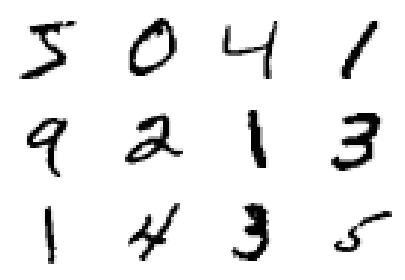

In [7]:
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis("off")
plt.tight_layout()
plt.show()

The `y` arrays contain labels for the samples contained in `X`.

In [8]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

The simplest way to feed the 28 x 28 images into a neural network is to reshape them to 1D arrays.

In [9]:
X_train = X_train.reshape(60000, 784).astype("float32")
X_valid = X_valid.reshape(10000, 784).astype("float32")

In [10]:
X_train.shape, X_valid.shape

((60000, 784), (10000, 784))

Pixel values are scaled by the max value (255), so that they range from 0 to 1.

In [11]:
X_train = X_train / 255
X_valid = X_valid / 255

Target values are one-hot encoded.

In [12]:
n = 10
y_train = keras.utils.to_categorical(y_train, num_classes=n)
y_valid = keras.utils.to_categorical(y_valid, num_classes=n)

In [13]:
y_train.shape, y_valid.shape

((60000, 10), (10000, 10))

Create a shallow neural network with one hidden layer.

In [14]:
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

The number of parameters in the hidden layer depends on the number of neurons in the hidden layer and in the input layer: $n_{param} = n_{weights} + n_{biases}$.

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
784 * 64 + 64 # 1 parameter for each of the 784 input neurons * 64 hidden neurons + 64 additional bias terms

50240

In [20]:
64 * 10 + 10 # 1 parameter for each of the 64 hidden layer neurons * 10 output neurons + 10 additional bias terms

650

In [21]:
(784 * 64 + 64) + (64 * 10 + 10) # total number of parameters

50890

Compile the model.

In [22]:
model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01), metrics=["accuracy"])

Fit the model to the training data.

In [25]:
hist = model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=200,
          verbose=0,
          validation_data=(X_valid, y_valid))

Plot learning history.

In [26]:
val_loss = hist.history["val_loss"]
val_accuracy = hist.history["val_accuracy"]
loss = hist.history["loss"]

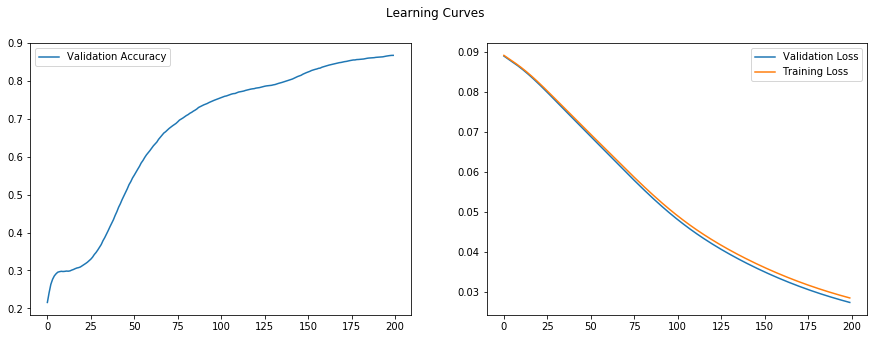

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=range(0,len(val_accuracy)), y=val_accuracy, ax=ax[0], label="Validation Accuracy")
sns.lineplot(x=range(0,len(val_loss)), y=val_loss, ax=ax[1], label="Validation Loss")
sns.lineplot(x=range(0,len(loss)), y=loss, ax=ax[1], label="Training Loss")

plt.suptitle("Learning Curves")
plt.show()

Final validation score.

In [42]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 26us/step


[0.027293850043416022, 0.8679999709129333]

In [ ]:
# model.save("model.hd5")
# model = model.load("model.hd5")